# Test of all function classes in the scattering library

## Domain class

Showing r grid:


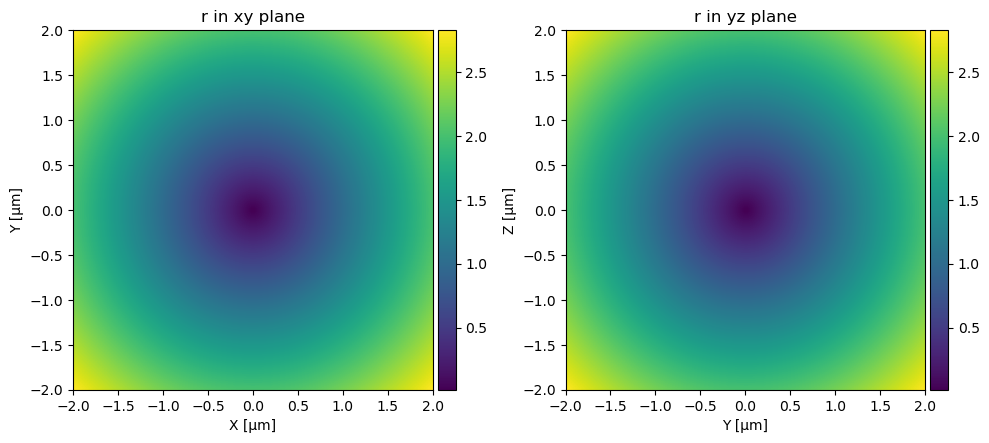

None
 
Showing theta grid:


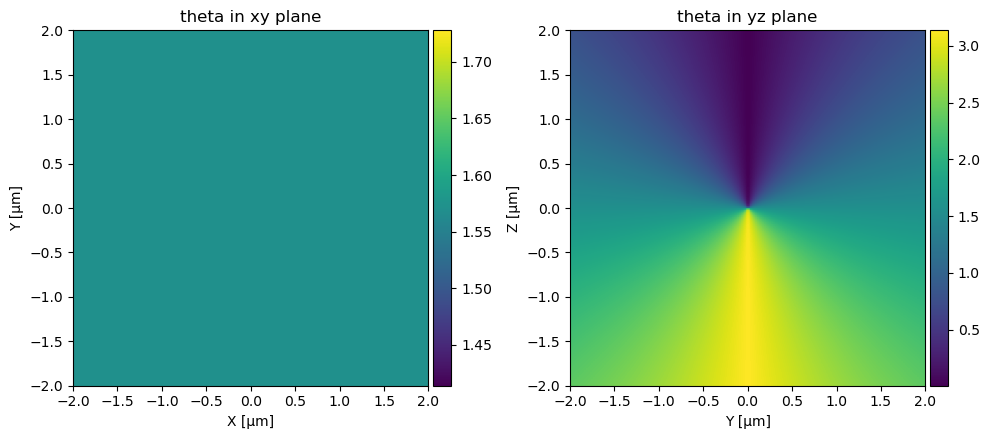

None
 
Showing phi grid:


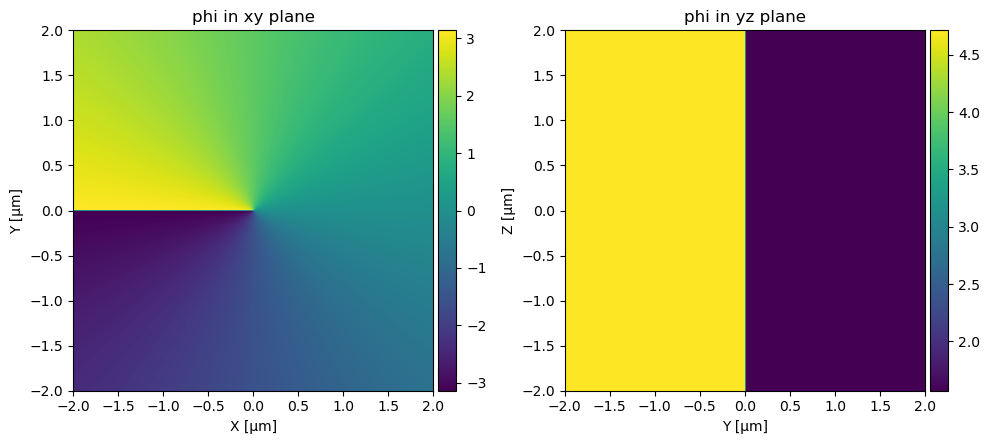

None
 


In [1]:
import numpy as np
from domain_class import *

#set domain size (domain will span -size to + size)
size = 2 #µm
#planes of interest
planes = {'xy', 'yz'}

#initiate domain object
d = domain(size, planes)

#transform grids in spherical coordinates
spherical_grids = d.spherical_grid()

coords = ['r', 'theta', 'phi']

#show coordinates for sanity check
for coord in coords:
    print(f'Showing {coord} grid:')
    print(d.show_coord(coord, spherical_grids))
    print(' ')



## Multipoles class

In [15]:
import numpy as np
from domain_class import *
from Multipoles import *

# initialize domain
size = 0.75
planes = {'xy', 'xz'}
d = domain(size, planes)

# initialize multipole object
mp = Multipoles(l_max = 5, m_max = 5, wl = 0.632, domain = d)

# calculate a multipole with l=m=3 (used in other scripts) 
mpp = mp.get_multipoles(l = 3, m = 3, spatial_fun = "bessel")

# display multipole structure
print(mpp.keys())

dict_keys(['magnetic', 'electric'])


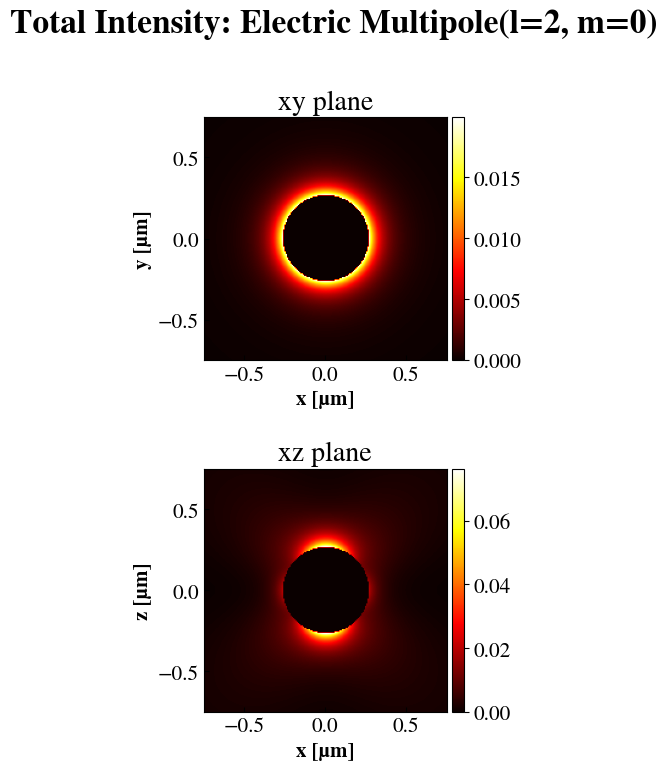

In [16]:
# plot multipole in polarization components
mp.plot_multipoles(l = 2, m = 0, type = "electric", interaction = "scattering", plot = "total", globalnorm = False)

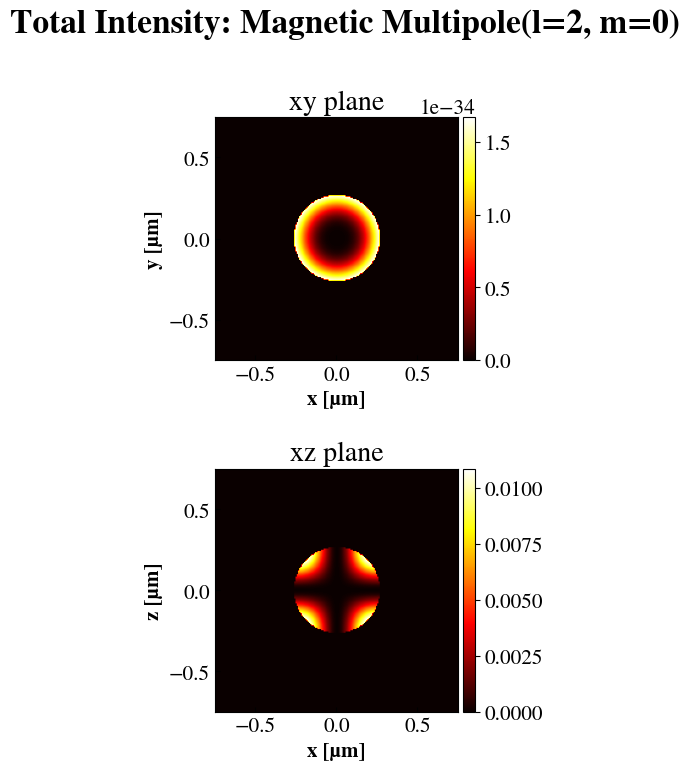

In [17]:
# plot total intensity 
mp.plot_multipoles(l = 2, m = 0, type = "magnetic", interaction = "internal", plot = "total", globalnorm = False)

0.03414742394984575


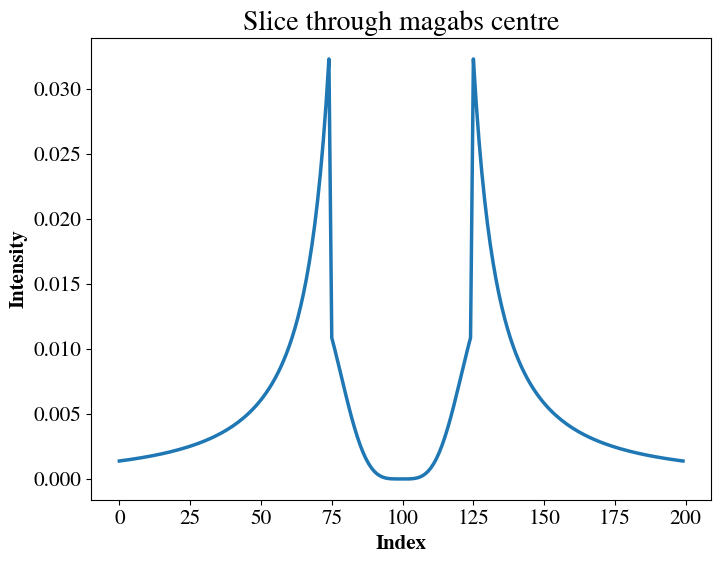

In [14]:
mpp = mp.get_multipoles(2, 0, "both")
magabs = np.sum(np.abs(mpp["magnetic"][:,1,:,:])**2, axis = 0)#*(np.ones_like(mp.R) * (mp.R < 0.25 * mp.R.max()))
magabs.shape
print(np.max(magabs))
import matplotlib.pyplot as plt

center_idx = magabs.shape[0] // 2
plt.figure(figsize=(8, 6))
#plt.plot(magabs.T[:, center_idx])
plt.plot(np.diag(magabs.T))
plt.title("Slice through magabs centre")
plt.xlabel("Index")
plt.ylabel("Intensity")
plt.show()

In [20]:
Ap1, A01, Am1 = mp.vsh(2, 3, 0, mp.Theta, mp.Phi)

In [21]:
t = Ap1[1]
print(t)

[[ 0.18322594+2.24387063e-17j  0.1810489 +2.21720962e-17j
   0.17881405+2.18984048e-17j ...  0.17881405+2.18984048e-17j
   0.1810489 +2.21720962e-17j  0.18322594+2.24387063e-17j]
 [ 0.18536715+2.27009286e-17j  0.18322594+2.24387063e-17j
   0.18102651+2.21693533e-17j ...  0.18102651+2.21693533e-17j
   0.18322594+2.24387063e-17j  0.18536715+2.27009286e-17j]
 [ 0.18749308+2.29612795e-17j  0.18538881+2.27035814e-17j
   0.18322594+2.24387063e-17j ...  0.18322594+2.24387063e-17j
   0.18538881+2.27035814e-17j  0.18749308+2.29612795e-17j]
 ...
 [-0.18749308-0.00000000e+00j -0.18538881-0.00000000e+00j
  -0.18322594-0.00000000e+00j ... -0.18322594-0.00000000e+00j
  -0.18538881-0.00000000e+00j -0.18749308-0.00000000e+00j]
 [-0.18536715-0.00000000e+00j -0.18322594-0.00000000e+00j
  -0.18102651-0.00000000e+00j ... -0.18102651-0.00000000e+00j
  -0.18322594-0.00000000e+00j -0.18536715-0.00000000e+00j]
 [-0.18322594-0.00000000e+00j -0.1810489 -0.00000000e+00j
  -0.17881405-0.00000000e+00j ... -0.17881

## Focused beams class

In [1]:
import numpy as np
from focused_beams_class import *
from domain_class import * 
from Multipoles import * 

In [6]:
#initialize domain
size = 3
planes = {'xy', 'yz'}
d = domain(size, planes)

# initialize focused_beams object
foc = focused_beams(type = "LaguerreGauss", maxJ = 25, wl = 0.632, domain = d, p = 1, l = 0, q = 0, nr=1, NA=0.9, f=1000, n_lens=1)

The (2j+1)Cjm_z normalization yields 1.996591
The LG integral on the aplanatic lens surface is 0.998



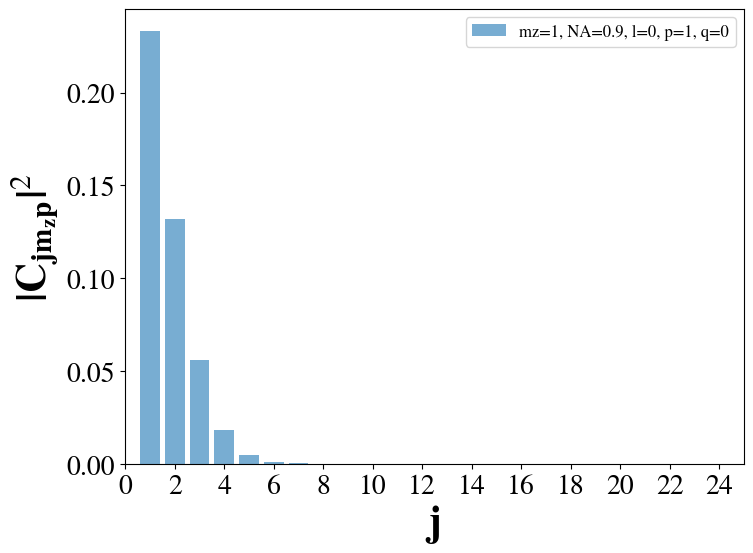

In [7]:
# display multipole content
foc.plot_Cjl()

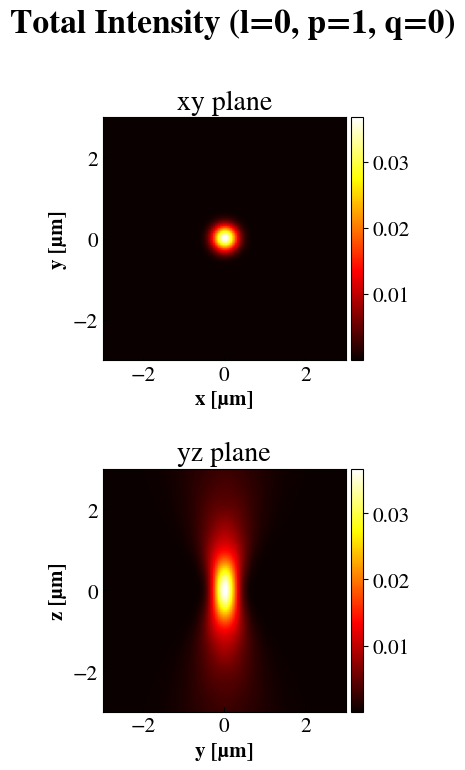

In [8]:
# plot beam
foc.plot_beam(interaction="both", plot="total", globalnorm=True) 

## Plane wave test

In [1]:
import numpy as np
from planewave import *
from domain_class import * 
from Multipoles import * 

## Displaced beams class

In [1]:
import numpy as np
from focused_beams_class import *
from domain_class import *
from displaced_beams import *
from mie import *
from Multipoles import *

In [2]:
# define domain
dom = domain(size = 3, planes={"xy", "yz"})

#define displacement vector in microns
disp_vec = np.array([0, 0.8, 0]) #0.8µm displacement in y
wl = 0.632

#polarisation
p = 1

#maximum order (for initialization)
maxJ = 20

#initialize BeamDisplacement object
disp = BeamDisplacement(dom, disp_vec, wl, p, maxJ, NA=0.9, f=1000, n_lens=1)

The (2j+1)Cjm_z normalization yields 1.996529
The LG integral on the aplanatic lens surface is 0.998

Loaded CG1 and CG2 from file.


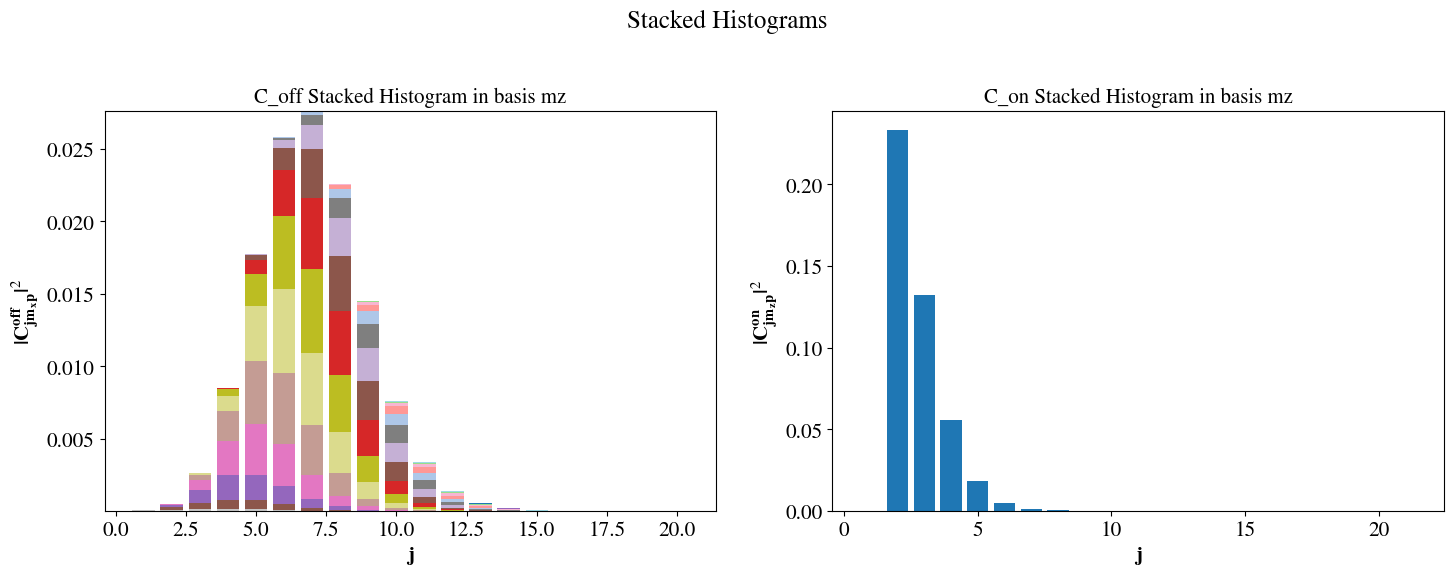

In [3]:
# plot multipolar content in mz basis 
disp.plot_stacked_histograms()

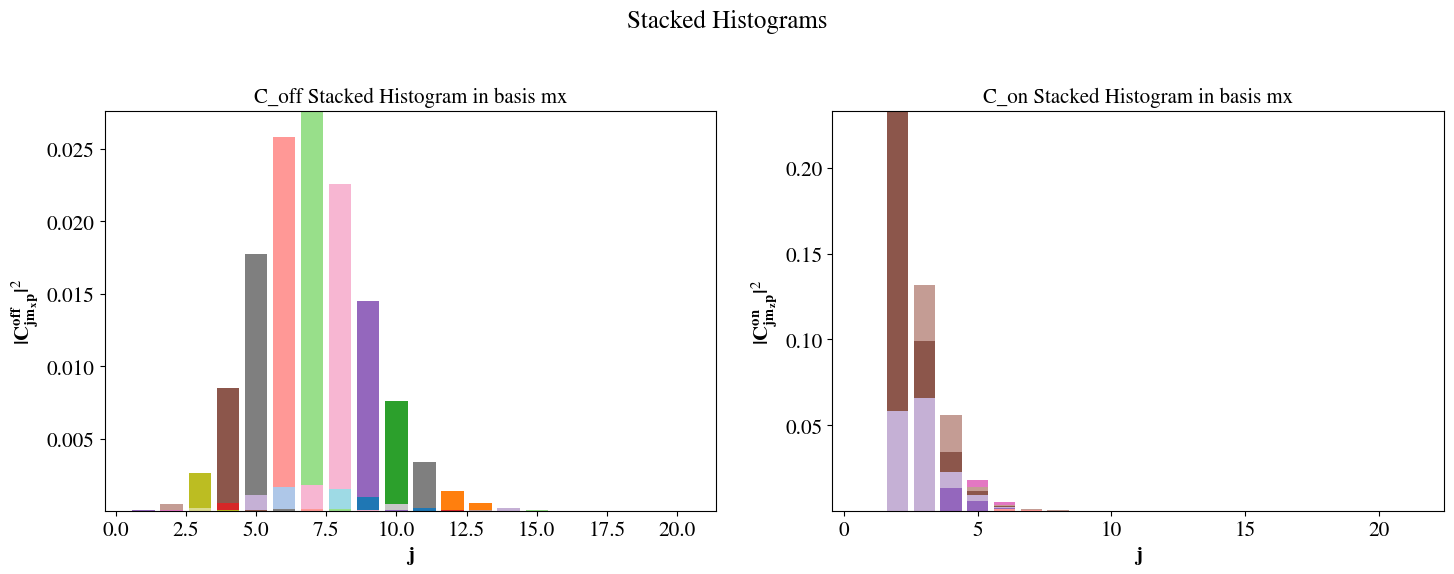

In [4]:
# plot in mx basis
disp.plot_stacked_histograms(basis = "mx")

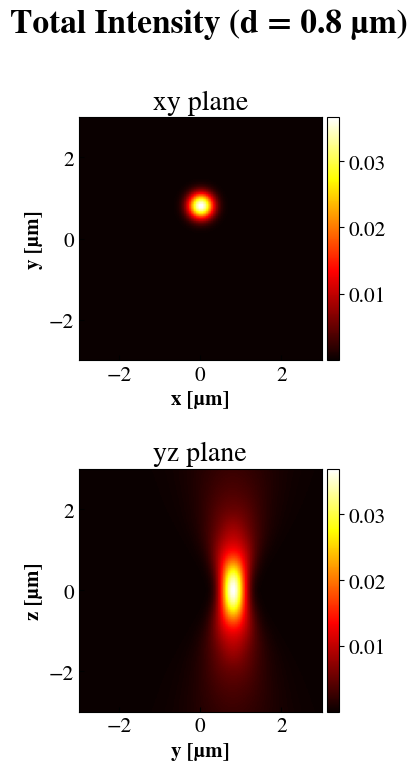

In [5]:
# plot intensity of the displaced beam 
disp.plot_beam(interaction = "both", plot="total")

### Paper validation

Here, I validate the beam coefficients with Fig. 4 in Zambrana-Puyalto et al., Laser Photonics Rev. 2021

In [9]:
import numpy as np
from focused_beams_class import *
from domain_class import *
from displaced_beams import *
from mie import *
from Multipoles import *

# define domain
dom = domain(size = 10, planes={"xy", "yz"})

#define displacement vector in microns
disp_vec = np.array([0, 4, 0]) #0.8µm displacement in y
wl = 0.640

#polarisation
p = 1

#maximum order (for initialization)
maxJ = 50

#initialize BeamDisplacement object
disp = BeamDisplacement(dom, disp_vec, wl, p, maxJ, NA=0.9, f=1000, n_lens=1)

The (2j+1)Cjm_z normalization yields 1.996704
The LG integral on the aplanatic lens surface is 0.998

Loaded CG1 and CG2 from file.


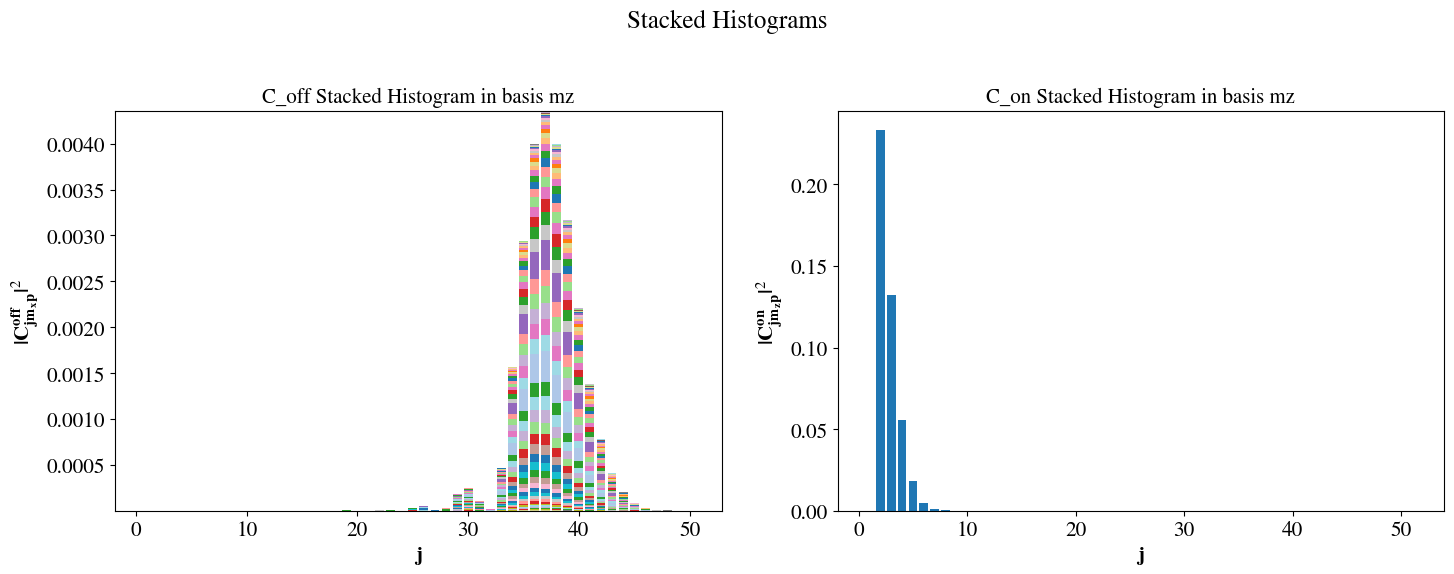

In [10]:
# plot multipolar content in mz basis 
disp.plot_stacked_histograms()

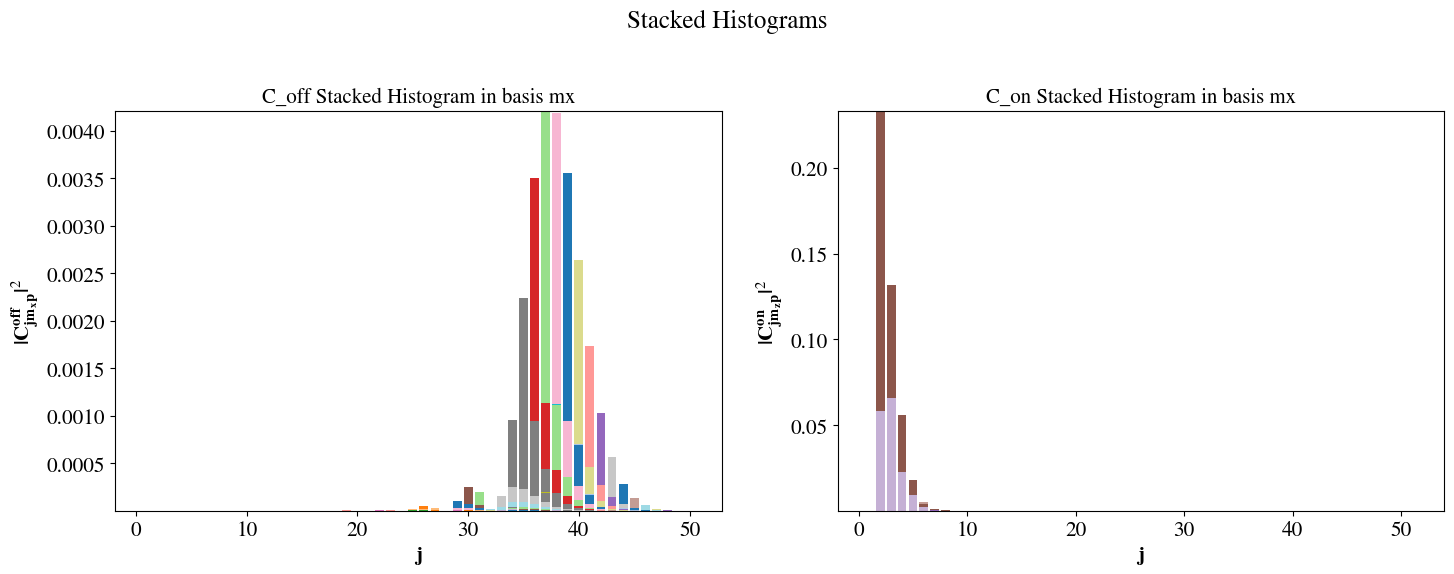

In [3]:
# plot in mx basis
disp.plot_stacked_histograms(basis = "mx")

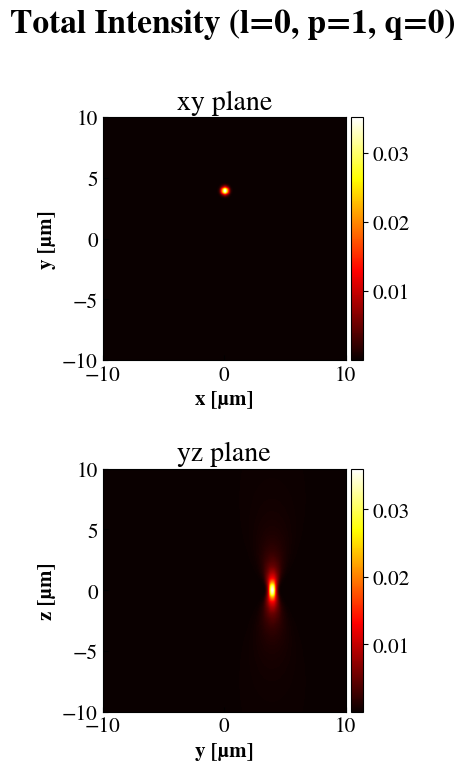

In [4]:
# plot intensity of the displaced beam 
disp.plot_beam(interaction = "both", plot="total")

## GLMT class

In [12]:
import numpy as np
from domain_class import *
from mie import *
import pandas as pd

In [19]:
from scipy.interpolate import interp1d

df=pd.read_csv("./nrdata.txt", sep="\t",header=8,decimal='.') # write path to import correctly,import real part of the complex refractive index n+ik 
wl=df.iloc[:, 0]
nr=df.iloc[:, 1] 
wl = wl.to_numpy()
nr = nr.to_numpy()
# Interpolate wl and nr to 1000 points
wl_interp = np.linspace(wl.min(), wl.max(), 1000)
nr_interp_func = interp1d(wl, nr, kind='cubic')
nr_interp = nr_interp_func(wl_interp)

In [21]:
wl = wl_interp.copy()
nr = nr_interp.copy()

In [32]:
# permittivities
mu = 1
mu1 = 1

#relative refractive index
#nr = np.linspace(1.1, 2, 100)
#nr = 1.5

#wl = 0.632 #microns
R = 0.075 #microns
# size parameter
#x = np.linspace(0.01, 20, 1000)
x = 2 * np.pi * R / wl  # size parameter, x = 2πR/λ
# maximum order
maxJ = 25

mie = glmt(maxJ , wl, nr, x, dim = 1)

In [33]:
a = mie.a_j()
b = mie.b_j()

In [34]:
a.shape

(26, 1000)

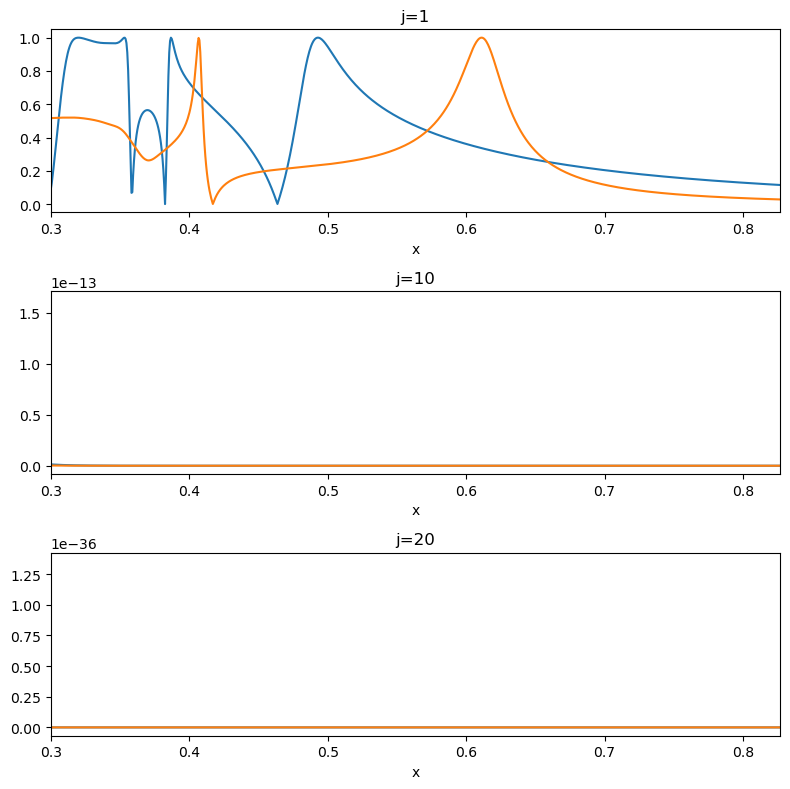

In [35]:
#plot 4 coefficients for j=0-4
j = np.array([1,10,20])
fig, ax = plt.subplots(3,1, figsize=(8,8))
ax[0].set(title=r"j=1", xlabel="x")
ax[1].set(title=r"j=10", xlabel="x")
ax[2].set(title=r"j=20", xlabel="x")
a = mie.a_j()
b = mie.b_j()
c = mie.c_j()
d = mie.d_j()
for i in range(3):
    ax[i].plot(wl, np.abs(a[j[i]]), label='b')
    ax[i].plot(wl, np.abs(b[j[i]]), label='b')
    ax[i].set_xlim(0.3, wl.max())
fig.tight_layout()
plt.show()

## Interaction class

### Centered focused LG beam of order l=3 at $C_{int}$ resonance

In [12]:
import numpy as np
from focused_beams_class import *
from domain_class import *
from displaced_beams import *
from mie import *
from Multipoles import *
from interaction_class import *

In [13]:
#define domain
d = domain(2)

# define beam
beam = focused_beams(type = "LaguerreGauss", maxJ = 25, wl = 0.632, domain = d, p = 1, l = 0, q = 0, NA=0.9, f=1000, n_lens=1)

inter = interaction(beam, domain=d, nr=1.5, radius=1.3, mu=1.0, mu1=1.0, interaction="both")

The (2j+1)Cjm_z normalization yields 1.996591
The LG integral on the aplanatic lens surface is 0.998



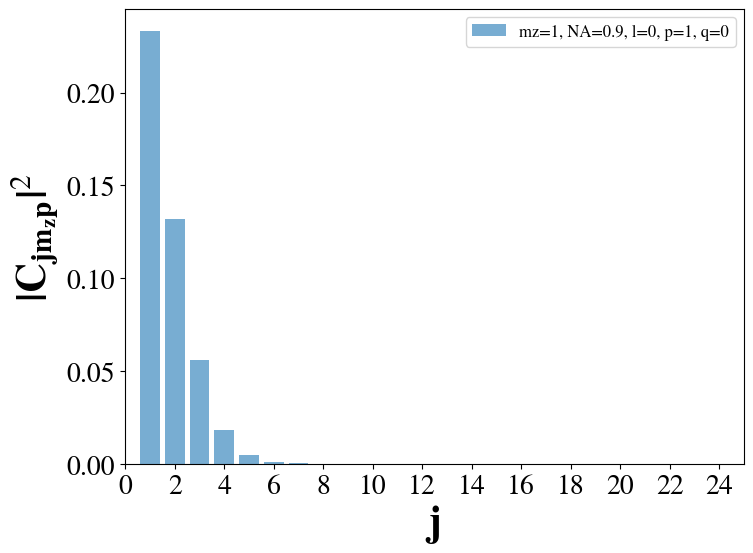

In [15]:
beam.plot_Cjl()

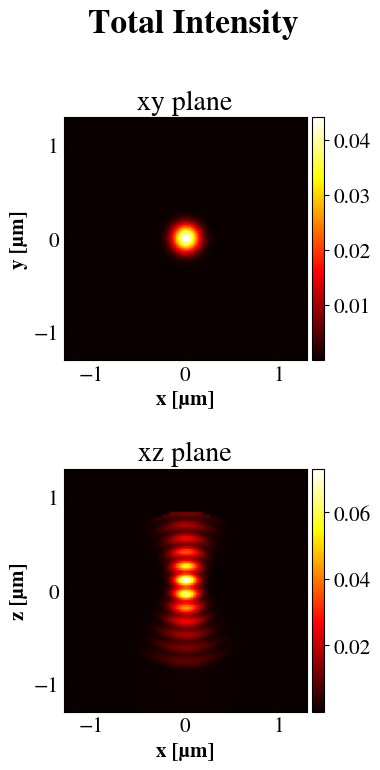

In [14]:
# plot
inter.plot_int(plot="total", globalnorm=False)

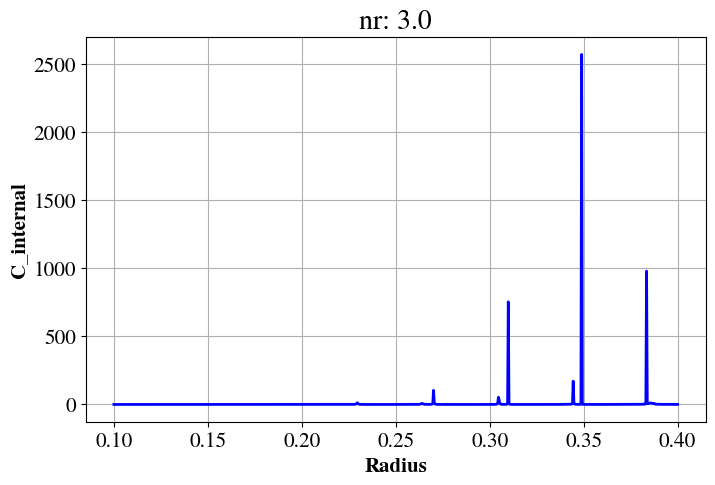

In [ ]:
inter.plotCrossSection(type="scattering", radius = np.linspace(0.1, 0.4, 800))